In [1]:
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

In [2]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv(r"/content/Train_Data.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
data["Gender"] = le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

#data = pd.get_dummies(data)
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


In [19]:
X = data.drop(["Loan_Status","Loan_ID"],axis=1)
y = data["Loan_Status"]

Feature importance by XGBoost:->

Gender -> 0.048389554
Married -> 0.03748883
Dependents -> 0.038220737
Education -> 0.03030232
Self_Employed -> 0.04633336
ApplicantIncome -> 0.040581986
CoapplicantIncome -> 0.052222297
LoanAmount -> 0.045142516
Loan_Amount_Term -> 0.032039627
Credit_History -> 0.5816295
Property_Area -> 0.047649153


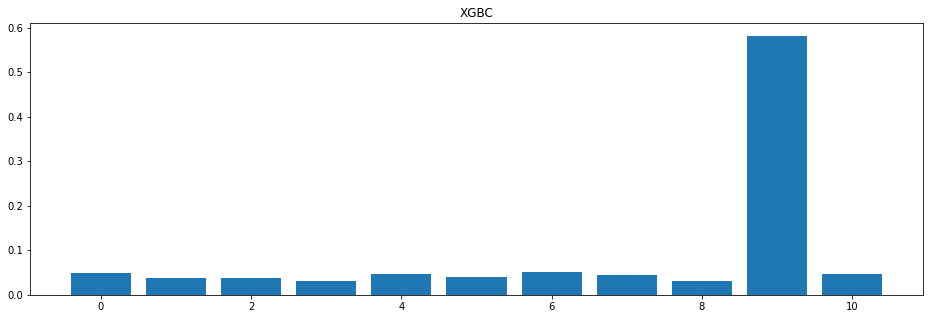

Feature importance by Random Forest:->

Gender -> 0.019630589565532902
Married -> 0.02559504957404561
Dependents -> 0.049157572439178676
Education -> 0.023630790154612037
Self_Employed -> 0.01865180604680897
ApplicantIncome -> 0.20783120022560445
CoapplicantIncome -> 0.11574999326011193
LoanAmount -> 0.19105290254580654
Loan_Amount_Term -> 0.04072030900841371
Credit_History -> 0.2623350430476442
Property_Area -> 0.04564474413224086


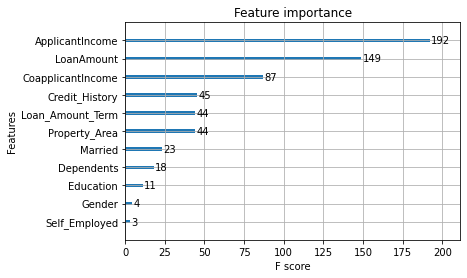

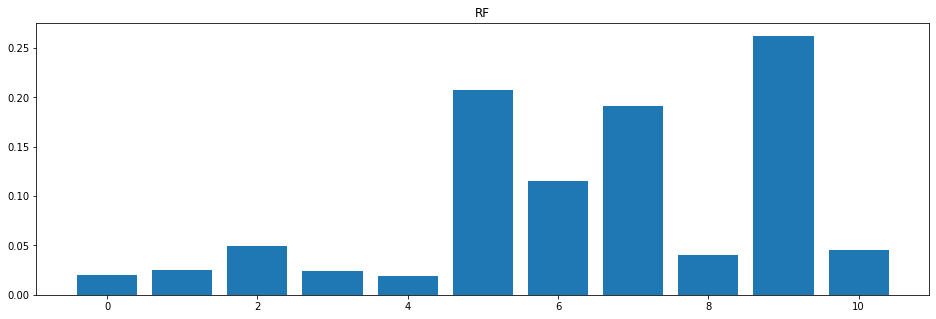

Feature importance by Decision Tree:->

Gender -> 0.025933605406354223
Married -> 0.016958088901090303
Dependents -> 0.06003225417553847
Education -> 0.028422966537579704
Self_Employed -> 0.012773525390157501
ApplicantIncome -> 0.21563129493367292
CoapplicantIncome -> 0.10651065144987923
LoanAmount -> 0.179073989819445
Loan_Amount_Term -> 0.02943007497014761
Credit_History -> 0.2922008668920113
Property_Area -> 0.03303268152412379


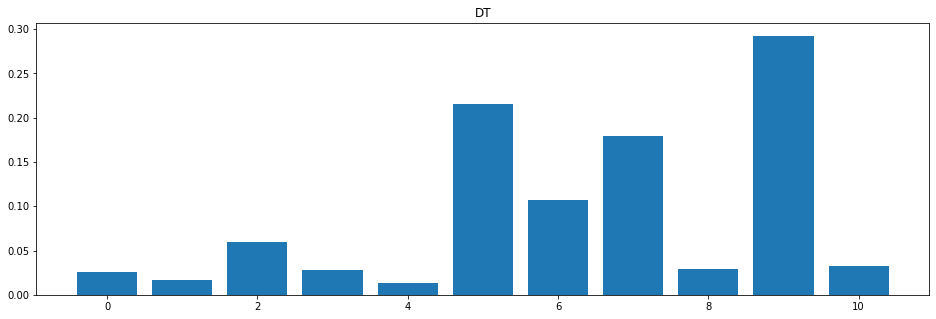

Feature importance by Suppoprt Vector Machine:->

Gender -> -0.011153748611395287
Married -> 0.016433621802949716
Dependents -> -0.0003948864299205823
Education -> -0.007897250281862611
Self_Employed -> -0.0045186612877454735
ApplicantIncome -> 0.009509713938893327
CoapplicantIncome -> 0.0009391121595605512
LoanAmount -> -0.012713675348784648
Loan_Amount_Term -> 8.910680668350324e-05
Credit_History -> 2.0812104159306477
Property_Area -> -0.0006557085562250223


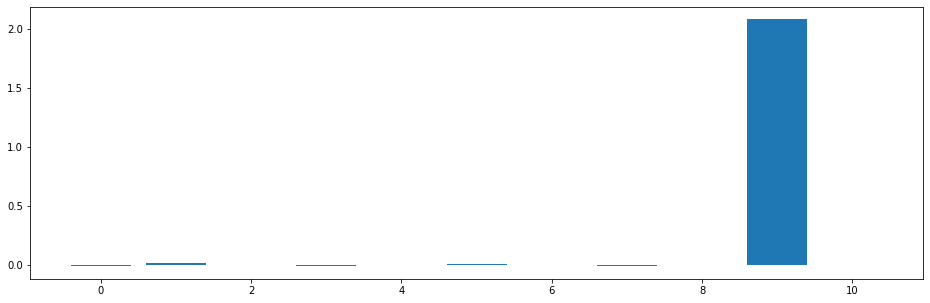

Feature importance by Logistic Regression:->

Gender -> -0.15996060813511417
Married -> 0.4352430003826714
Dependents -> 0.06055713171122034
Education -> -0.41709300756576173
Self_Employed -> 0.04244358216670217
ApplicantIncome -> 0.10034901379239144
CoapplicantIncome -> 0.04516863735626481
LoanAmount -> -0.5526774590223547
Loan_Amount_Term -> -0.001187807052589423
Credit_History -> 3.2799000095773487
Property_Area -> 0.06101486330333224


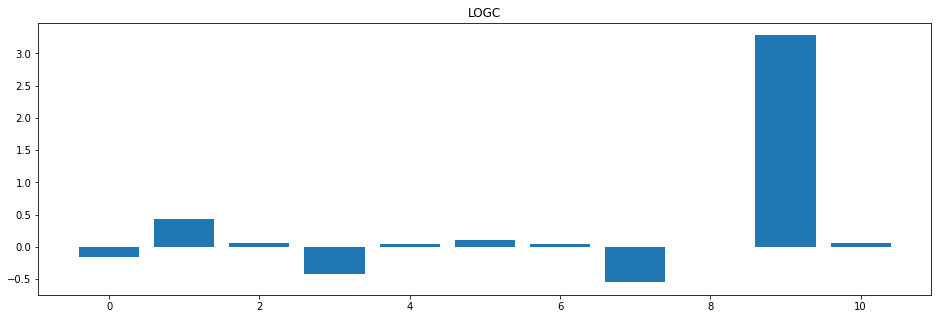

In [20]:
print("Feature importance by XGBoost:->\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Suppoprt Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()

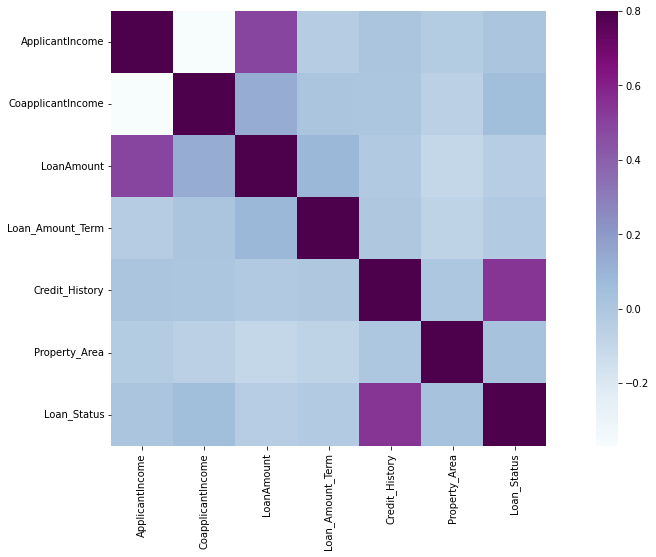

In [21]:
#Heat map of dataset with relative importance
matrix = data.drop(["Gender","Married","Dependents","Education","Self_Employed"],axis=1).corr()
#f , ax = plt.subplots(figsize=(18,6))
plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

In [22]:
A = list(data.Loan_Status).count(1)
B = list(data.Loan_Status).count(0)
print("Count of 1: ",A,"\nCount of 0: ",B)

fig = px.bar((A,B),x=["Approved","Rejected"],y=[A,B],color=[A,B])
fig.show()

Count of 1:  422 
Count of 0:  192


In [23]:
#To keep original data as it is to use the same for later.
new_data = data.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 1    192
0    192
Name: Loan_Status, dtype: int64
Upsampled data:->
 1    422
0    422
Name: Loan_Status, dtype: int64
